# 讀資料＋前處理

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import os
os.chdir("/content/drive/Shareddrives/contest/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pchome = pd.read_csv('data/2021datapilot_PChome.csv')
pchome.rename(columns={'Unnamed: 0':'MEM_ID', 'Unnamed: 1':'POSTAL_CD','Unnamed: 2':'ORDER_ID'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pchome.head()

,MEM_ID,POSTAL_CD,ORDER_ID,DATE_CD,TIME_CD,DEPARTMENT,GOODS,PROD_ID,PRICE,PRIME
0,c87fdf5e-9dca-4a3e-e053-6f1f0a0ac0f8,401,20200101000924,2020/01/01,12:59:22,家電,【一次換到好】2入 Coway：AP-1512HH 旗艦環禦型 水洗濾網(取代活性碳&HEP...,DMAU0C-A900AETV8-000,"$2,693",否
1,c87fdf5e-9dca-4a3e-e053-6f1f0a0ac0f8,401,20200101000924,2020/01/01,12:59:22,家電,【怡悅HEPA濾心】適用honeywell HPA-100APTW/HPA-200APTW/...,DMAU0D-A90054ZZQ-000,"$1,140",否
2,c87fdf5e-9dca-4a3e-e053-6f1f0a0ac0f8,401,20200101000924,2020/01/01,12:59:22,家電,【怡悅HEPA濾心】適用honeywell HPA-100APTW/HPA-200APTW/...,DMAU0D-A90054ZZQ-000,"$1,140",否
3,c87fdf5e-9dca-4a3e-e053-6f1f0a0ac0f8,401,20200113182398,2020/01/13,11:33:43,休閒,Durex 杜蕾斯特級潤滑液,DEAJ17-A42975500-000,$310,否
4,c87fdf5e-9dca-4a3e-e053-6f1f0a0ac0f8,401,20200113182398,2020/01/13,11:33:43,休閒,DUREX杜蕾斯 超潤滑型 保險套 12入,DABC1S-A9005YCU6-000,$300,否


In [ ]:
print(pchome.columns)
pchome.dtypes

Index(['MEM_ID', 'POSTAL_CD', 'ORDER_ID', 'DATE_CD', 'TIME_CD', 'DEPARTMENT',
       'GOODS', 'PROD_ID', 'PRICE', 'PRIME'],
      dtype='object')


MEM_ID        object
POSTAL_CD     object
ORDER_ID       int64
DATE_CD       object
TIME_CD       object
DEPARTMENT    object
GOODS         object
PROD_ID       object
PRICE         object
PRIME         object
dtype: object

In [ ]:
pchome.rename(columns={'MEM_ID':'ID', 'DATE_CD':'DATE'}, inplace=True)
pchome['DATE'] = pd.to_datetime(pchome['DATE'])
today=pd.to_datetime('2020-12-31')
pchome['PRICE'] = pchome['PRICE'].astype(str).str.replace(',','').str.replace('$','').astype(int)

# 1=prime// 0=not prime
class_mapping = { '否':0, '是':1}
pchome[ 'PRIME' ] = pchome[ 'PRIME' ].map(class_mapping)

In [ ]:
pchome['DEPARTMENT'].unique()

array(['家電', '休閒', '日用', '筆電', '通訊', '周邊', '食品', '生活', '3C', '美妝', '書店',
       '衣鞋包錶', '數位', nan], dtype=object)

In [ ]:
class_mapping = {'家電':0, '休閒':1, '日用':2, '筆電':3, '通訊':4, '周邊':5, '食品':6, '生活':7, '3C':8, '美妝':9, '書店':10,
       '衣鞋包錶':11, '數位':12,'nan':13}
pchome[ 'Department_c' ] = pchome[ 'DEPARTMENT' ].map(class_mapping)

# 敘述統計(畫圖)  

Text(0, 0.5, 'count')

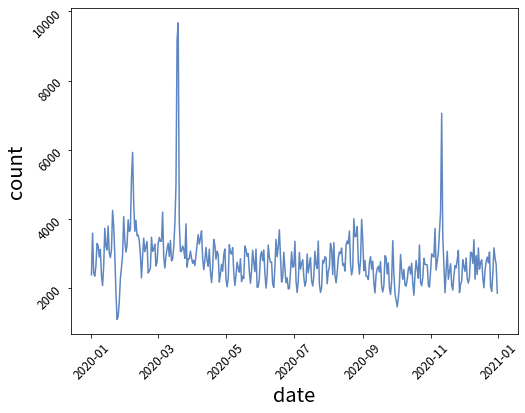

In [ ]:
order_df=pchome.groupby('DATE').agg({'ORDER_ID':'count'})
fig = plt.figure(figsize = (8,6))
plt.plot(order_df.index,order_df['ORDER_ID'],color = '#5e86c1')
#plt.text(4, 3, '3/19')
plt.xticks(rotation=45, size=12)
plt.yticks(rotation=45, size=12)
month=['1','3','5','7','9','1']

plt.xlabel('date',size=20)
plt.ylabel('count',size=20)
#plt.scatter(order_df.index,order_df['ORDER_ID'],c='#5e86c1',s=15)

In [ ]:
np.shape(np.where(pchome319['Department_c']==1))

(1, 215)

In [ ]:
department_c_n=[]
pchome319= pchome.iloc[np.where(pchome['DATE']=='2020-03-19')]
for i in range(13):
  total=np.shape(np.where(pchome319['Department_c']==i))[1]
  department_c_n.append(total)

array([ 6,  2,  7,  5,  1,  9,  0,  8,  4, 11, 10, 12,  3])

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
from matplotlib.font_manager import fontManager
import matplotlib as mpl
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2021-11-15 07:40:43--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.188.206, 2607:f8b0:4004:836::200e
Connecting to drive.google.com (drive.google.com)|142.250.188.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/usua1s858i1eeh7s3onk0230tadj0pus/1636962000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-11-15 07:40:44--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/usua1s858i1eeh7s3onk0230tadj0pus/1636962000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.33.193, 2607:f8b0:4004:837::2001
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.251.33.19

In [ ]:
#print(department_c_n.sort(reverse=True))
department_c_n.sort(reverse=True)


[5442, 2143, 588, 216, 215, 159, 130, 112, 109, 85, 74, 28, 12]


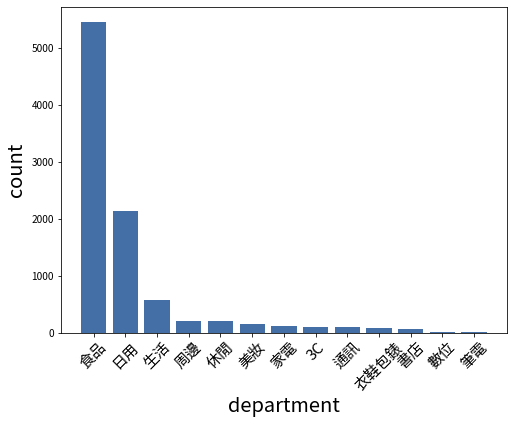

In [ ]:
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
fig = plt.figure(figsize = (8,6))
department_c_n1=sorted(department_c_n,reverse = True)
index=np.argsort(-np.array(department_c_n))
department_name=list(pchome[ 'DEPARTMENT' ].unique()[:13])
department_name1=list(np.array(pd.DataFrame(department_name).iloc[index]).flatten())
#students = ['Jack', 'Mary', 'Mike', 'David']
col=['#5e86c1', '#758bb3', '#8690a5', '#959696', '#a19b88', '#aca179', '#b6a769']
x = np.arange(len(department_name1))

from matplotlib.font_manager import fontManager


plt.bar(x, department_c_n1, color=['#436ea6'],tick_label=department_name1)
plt.xticks(x, department_name1,rotation=45, size=15)
plt.xlabel('department',size=20)
plt.ylabel('count',size=20)
# plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
# plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [ ]:
daily_use=pchome.iloc[np.where(pchome['DEPARTMENT']=='日用')]
daily_df=daily_use.groupby('DATE').agg({'ORDER_ID':'count'})
daily_df

,ORDER_ID
DATE,
2020-01-01,579
2020-01-02,733
2020-01-03,578
2020-01-04,618
2020-01-05,647
...,...
2020-12-27,627
2020-12-28,722
2020-12-29,696


Text(0, 0.5, 'count')

<Figure size 576x432 with 0 Axes>

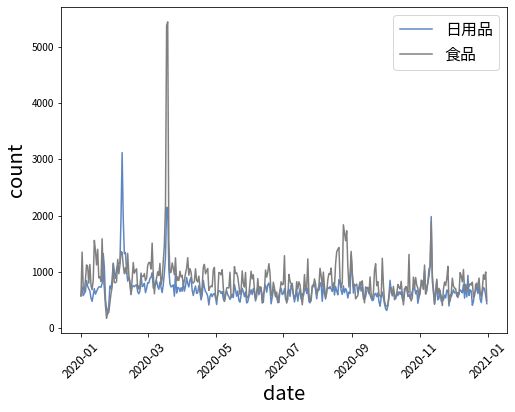

In [ ]:
fig = plt.figure(figsize = (8,6))
daily_use=pchome.iloc[np.where(pchome['DEPARTMENT']=='日用')]
daily_df=daily_use.groupby('DATE').agg({'ORDER_ID':'count'})
food=pchome.iloc[np.where(pchome['DEPARTMENT']=='食品')]
food_df=food.groupby('DATE').agg({'ORDER_ID':'count'})
fig = plt.figure(figsize = (8,6))
plt.plot(daily_df.index,daily_df['ORDER_ID'],color = '#5e86c1',label='日用品')
plt.plot(food_df.index,food_df['ORDER_ID'],color = 'grey', label='食品')
#plt.text(4, 3, '3/19')
plt.xticks(rotation=45, size=12)
plt.xticks(rotation=45, size=12)
plt.legend(fontsize=16)
plt.xlabel('date',size=20)
plt.ylabel('count',size=20)

# def

In [ ]:
def kmeans_rfm(data):
  #挑選適合的k
  from sklearn.cluster import KMeans
  SSE = []  # 存放每次結果的誤差平方和
  for k in range(1, 20):
      kmeans = KMeans(n_clusters=k)  # 構造聚類器
      kmeans.fit(data)
      SSE.append(kmeans.inertia_)
  d=[]
  sse=pd.DataFrame(SSE)
  difference=sse.diff().drop(0,axis=0)
  for i in range(1,difference.shape[0]):
    d.append(difference.loc[i]/difference.loc[i+1])
  d=pd.DataFrame(d)
  k=(np.where(d==d.max())[0]+2)[0]

  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data)
  rfm_cluster = kmeans.predict(data)

  return(rfm_cluster)

In [ ]:
def standardize(data):
  mean= data.mean()
  std= data.std()
  return((data-mean)/std)

def normalize(data):
  return((data-data.min())/(data.max()-data.min()))

In [ ]:
def rfm_matrix(pchome):
  #讀R
  om_ren=pchome.groupby(['ID']).agg({'DATE':'max'})
  today=pd.to_datetime('2020-12-31')
  om_ren=pd.DataFrame(om_ren)
  om_ren['minus']=pd.Series(today-om_ren['DATE'])

  minus=[]
  for i in range(len(om_ren['minus'])):
    minus.append(om_ren['minus'][i].days)
  om_ren['minus']=minus

  #讀F
  uni_order=np.unique(pchome['ORDER_ID'])
  uni_mem=np.unique(pchome['ID'])
  om_id=pchome.groupby(['ORDER_ID', 'ID']).agg('count')
  mem_id=[]
  for idx in pd.DataFrame(om_id).index:
    mem_id.append(idx[1])
  mem_id=pd.DataFrame(mem_id)
  final_pchome=pd.crosstab(index=mem_id[0], columns='count')

  #讀M
  om_price=pchome.groupby(['ID']).agg({'PRICE':'sum'})
  # om_price.PRICE

  #合併成初始RFM
  rfm = pd.concat([om_ren,final_pchome,om_price], axis=1)
  rfm=rfm.drop(['DATE'],axis=1)
  rfm.rename(columns={'minus':'R', 'count':'F','PRICE':'M'}, inplace = True)

  # standardize
  rfm['r_z']= standardize(rfm.R)
  rfm['f_z']= standardize(rfm.F)
  rfm['m_z']= standardize(rfm.M)

  # normalize
  rfm['r_n']= normalize(rfm.R)
  rfm['f_n']= normalize(rfm.F)
  rfm['m_n']= normalize(rfm.M)

  #kmeans
  rfm['r_z_record'] = kmeans_rfm(np.array(rfm['r_z']).reshape(-1,1))
  rfm['f_z_record']= kmeans_rfm(np.array(rfm['f_z']).reshape(-1,1))
  rfm['m_z_record']= kmeans_rfm(np.array(rfm['m_z']).reshape(-1,1))
  rfm['rfm_z_record']= kmeans_rfm(np.transpose(np.array([rfm['r_z'],rfm['f_z'],rfm['m_z']])))
  rfm['r_n_record'] = kmeans_rfm(np.array(rfm['r_n']).reshape(-1,1))
  rfm['f_n_record']= kmeans_rfm(np.array(rfm['f_n']).reshape(-1,1))
  rfm['m_n_record']= kmeans_rfm(np.array(rfm['m_n']).reshape(-1,1))
  rfm['rfm_n_record']= kmeans_rfm(np.transpose(np.array([rfm['r_n'],rfm['f_n'],rfm['m_n']])))

  return(rfm)

In [ ]:
new_rfm=rfm_matrix(pchome)
new_rfm
print(new_rfm.shape)
print(new_rfm.columns)

(19998, 17)
Index(['R', 'F', 'M', 'r_z', 'f_z', 'm_z', 'r_n', 'f_n', 'm_n', 'r_z_record',
       'f_z_record', 'm_z_record', 'rfm_z_record', 'r_n_record', 'f_n_record',
       'm_n_record', 'rfm_n_record'],
      dtype='object')


In [ ]:
customer= new_rfm.index
prime=[]
for p in pchome.groupby(['ID']).agg({'PRIME':'sum'})['PRIME']:
  if p>0:
    prime.append(1)
  else:
    prime.append(0)


In [ ]:
prime_rfm=new_rfm.loc[: ,["r_z", "f_z", "m_z", "r_n", "f_n", "m_n","rfm_n_record" ]]
prime_rfm.head(2)


,r_z,f_z,m_z,r_n,f_n,m_n,rfm_n_record
c87fdf5e-9dca-4a3e-e053-6f1f0a0ac0f8,-0.622771,-0.145258,0.292370,0.027473,0.006699,0.016638,0
c87fdf5e-9dcb-4a3e-e053-6f1f0a0ac0f8,-0.590952,1.611654,0.188354,0.032967,0.031060,0.014343,0


# DEPARTMENT & POSTAL_CD處理


In [ ]:
dep_dum = pd.get_dummies(pchome.DEPARTMENT)
dep_dum = dep_dum.join(pchome.ID)
prime_rfm = prime_rfm.join(dep_dum.groupby("ID").sum())

post_dum = pd.get_dummies(pchome.POSTAL_CD)
post_dum = post_dum.join(pchome.ID)
prime_rfm = prime_rfm.join(post_dum.groupby("ID").sum())

In [ ]:
prime_rfm.head()

,r_z,f_z,m_z,r_n,f_n,m_n,rfm_n_record,3C,休閒,周邊,家電,數位,日用,書店,生活,筆電,美妝,衣鞋包錶,通訊,食品,100,103,104,105,106,108,110,111,112,114,115,116,200,201,202,203,204,205,206,207,...,907,908,909,911,912,913,920,923,925,926,928,929,931,932,940,941,944,946,950,951,952,953,954,956,957,958,961,963,965,970,971,972,973,974,975,976,978,979,981,983
c87fdf5e-9dca-4a3e-e053-6f1f0a0ac0f8,-0.622771,-0.145258,0.292370,0.027473,0.006699,0.016638,0,1.0,6.0,2.0,4.0,0.0,17.0,0.0,8.0,1.0,4.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c87fdf5e-9dcb-4a3e-e053-6f1f0a0ac0f8,-0.590952,1.611654,0.188354,0.032967,0.031060,0.014343,0,8.0,12.0,20.0,16.0,1.0,28.0,10.0,8.0,0.0,3.0,3.0,12.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c87fdf5e-9dcc-4a3e-e053-6f1f0a0ac0f8,-0.479587,2.094805,0.870535,0.052198,0.037759,0.029393,0,6.0,9.0,7.0,9.0,0.0,15.0,4.0,22.0,1.0,8.0,1.0,13.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c87fdf5e-9dcd-4a3e-e053-6f1f0a0ac0f8,-0.479587,-0.189181,-0.180697,0.052198,0.006090,0.006202,0,1.0,9.0,2.0,0.0,0.0,11.0,0.0,2.0,2.0,3.0,1.0,11.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c87fdf5e-9dce-4a3e-e053-6f1f0a0ac0f8,-0.670499,1.084580,0.622468,0.019231,0.023752,0.023920,0,5.0,7.0,0.0,10.0,0.0,24.0,0.0,3.0,0.0,5.0,0.0,1.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
prime_rfm['north'] = prime_rfm.iloc[:,[x for x in range(18,94)]].sum(1)
prime_rfm['w_n'] = prime_rfm.iloc[:,[x for x in range(95,122)]].sum(1)
prime_rfm['w'] = prime_rfm.iloc[:,[x for x in range(123,191)]].sum(1)
prime_rfm['w_s'] = prime_rfm.iloc[:,[x for x in range(192,295)]].sum(1)
prime_rfm["s"] = prime_rfm.iloc[:,[x for x in range(296,329)]].sum(1)
prime_rfm["e"] = prime_rfm.iloc[:,[x for x in range(330,355)]].sum(1)

In [ ]:
# prime_rfm.loc[: [ 'r_n', 'f_n', 'm_n', 'rfm_n_record','3C','休閒',  '周邊', '家電', '數位', '日用',
#           '書店', '生活', '筆電', '美妝','衣鞋包錶','通訊','食品','north',	'w_n',	'w',	'w_s',	's'	,'e']]

TypeError: ignored

In [ ]:
prime_rfm["Prime"] = pchome.groupby(['ID']).agg({'PRIME':'max'})['PRIME']

In [ ]:
prime_rfm.tail(5)

,r_z,f_z,m_z,r_n,f_n,m_n,rfm_n_record,3C,休閒,周邊,家電,數位,日用,書店,生活,筆電,美妝,衣鞋包錶,通訊,食品,100,103,104,105,106,108,110,111,112,114,115,116,200,201,202,203,204,205,206,207,...,923,925,926,928,929,931,932,940,941,944,946,950,951,952,953,954,956,957,958,961,963,965,970,971,972,973,974,975,976,978,979,981,983,north,w_n,w,w_s,s,e,Prime
c87fdf5f-5b53-4a3e-e053-6f1f0a0ac0f8,0.140880,-0.452718,-0.400160,0.159341,0.002436,0.001360,0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0
c87fdf5f-5b54-4a3e-e053-6f1f0a0ac0f8,-0.781865,-0.277027,-0.299209,0.000000,0.004872,0.003587,0,0.0,0.0,0.0,2.0,0.0,10.0,0.0,23.0,0.0,1.0,0.0,0.0,5.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0
c87fdf5f-5b55-4a3e-e053-6f1f0a0ac0f8,1.954551,-0.496641,-0.427559,0.472527,0.001827,0.000756,1,0.0,0.0,2.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0
c87fdf5f-5b56-4a3e-e053-6f1f0a0ac0f8,1.286357,-0.584487,-0.396789,0.357143,0.000609,0.001434,1,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0
c87fdf5f-5b57-4a3e-e053-6f1f0a0ac0f8,0.793165,-0.452718,-0.351973,0.271978,0.002436,0.002423,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0


# `prime_rfm PCA降維度+graph`

In [ ]:
from sklearn.cluster import KMeans
prime_new= prime_rfm.loc[:,['r_n','f_n','m_n','3C','休閒','周邊','家電','數位','日用','書店','生活','筆電','美妝',
                            '衣鞋包錶','通訊','食品','north','w_n','w','w_s','s','e']]
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(prime_new)
rfm_kmeans_result=kmeans.predict(prime_new)
np.unique(rfm_kmeans_result)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(prime_new)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
from sklearn.cluster import KMeans
prime_new= prime_rfm.loc[:,['r_n','f_n','m_n','3C','休閒','周邊','家電','數位','日用','書店','生活','筆電','美妝',
                            '衣鞋包錶','通訊','食品','north','w_n','w','w_s','s','e']]
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(prime_new)
rfm_kmeans_result=kmeans.predict(prime_new)
np.unique(rfm_kmeans_result)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(prime_new)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = principalDf
finalDf["Prime"] = prime_rfm['Prime']
#y.reset_index()["Prime"]

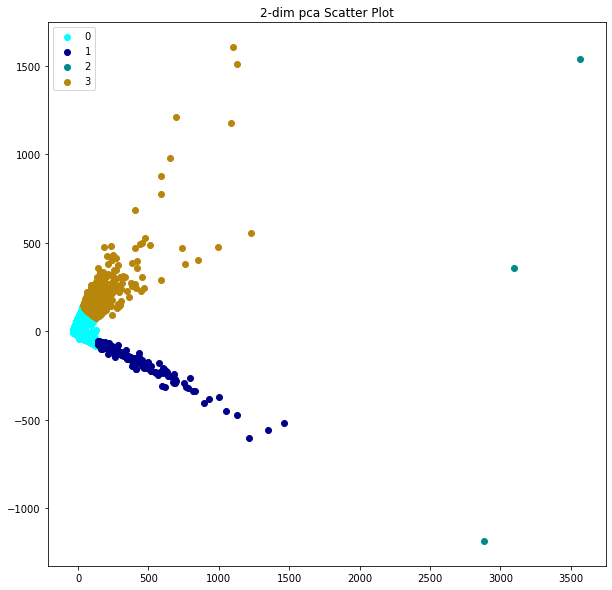

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
import matplotlib as mpl
colors = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()][20:40]
for i in range(len(np.unique(rfm_kmeans_result))):
  df1=finalDf.iloc[np.where(rfm_kmeans_result==np.unique(rfm_kmeans_result)[i])]
  plt.scatter(list(df1['principal component 1']), list(df1['principal component 2']),c=pal[i] ,label=i)
#plt.scatter(list(df2['principal component 1']), list(df2['principal component 1']),c="green",label='not prime')
#plt.xlabel("principal component 1")
#plt.ylabel("principal component 2")
plt.title("2-dim pca Scatter Plot")
plt.legend()

plt.show()

# RFM using standardize  

In [ ]:
from sklearn.cluster import KMeans
prime_new= prime_rfm.loc[:,['r_z','f_z','m_z','3C','休閒','周邊','家電','數位','日用','書店','生活','筆電','美妝',
                            '衣鞋包錶','通訊','食品','north','w_n','w','w_s','s','e']]
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(prime_new)
rfm_kmeans_result=kmeans.predict(prime_new)
np.unique(rfm_kmeans_result)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(prime_new)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


In [ ]:
# print(prime_new['r_z'].iloc[np.where(prime_rfm['Prime']==0)].mean())
# print(prime_new['r_z'].iloc[np.where(prime_rfm['Prime']==1)].mean())
# print(prime_new['r_z'].iloc[np.where(prime_rfm['Prime']==0)].std())
# print(prime_new['r_z'].iloc[np.where(prime_rfm['Prime']==1)].std())
# print(prime_new['f_z'].iloc[np.where(prime_rfm['Prime']==0)].mean())
# print(prime_new['f_z'].iloc[np.where(prime_rfm['Prime']==1)].mean())
# print(prime_new['f_z'].iloc[np.where(prime_rfm['Prime']==0)].std())
# print(prime_new['f_z'].iloc[np.where(prime_rfm['Prime']==1)].std())
# print(prime_new['m_z'].iloc[np.where(prime_rfm['Prime']==0)].mean())
# print(prime_new['m_z'].iloc[np.where(prime_rfm['Prime']==1)].mean())
# print(prime_new['m_z'].iloc[np.where(prime_rfm['Prime']==0)].std())
# print(prime_new['m_z'].iloc[np.where(prime_rfm['Prime']==1)].std())

0.021217657332701367
-0.2871476852104452
1.0128647188887034
0.7492883928837456
-0.039697021288818565
0.5372368680525912
0.79921635417629
2.362803385916269
-0.04722767269218786
0.6391524134258161
0.6995316778010566
2.7344617614172124


In [ ]:
from scipy.stats import f_oneway
print(f_oneway(new_rfm['R'].iloc[np.where(prime_rfm['Prime']==0)], new_rfm['R'].iloc[np.where(prime_rfm['Prime']==1)]))
print(f_oneway(new_rfm['F'].iloc[np.where(prime_rfm['Prime']==0)], new_rfm['F'].iloc[np.where(prime_rfm['Prime']==1)]))
#f_oneway(prime_new['f_z'].iloc[np.where(prime_rfm['Prime']==0)], prime_new['f_z'].iloc[np.where(prime_rfm['Prime']==1)])

F_onewayResult(statistic=122.58061783048026, pvalue=2.0834860602443813e-28)
F_onewayResult(statistic=435.7639600512058, pvalue=9.492455162665211e-96)


In [ ]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=prime_new['r_z'].iloc[np.where(prime_rfm['Prime']==0)], b= prime_new['r_z'].iloc[np.where(prime_rfm['Prime']==1)], equal_var=True)
stats.ttest_ind(a=prime_new['f_z'].iloc[np.where(prime_rfm['Prime']==0)], b= prime_new['f_z'].iloc[np.where(prime_rfm['Prime']==1)], equal_var=True)
print(stats.ttest_ind(a=prime_new['m_z'].iloc[np.where(prime_rfm['Prime']==0)], b= prime_new['m_z'].iloc[np.where(prime_rfm['Prime']==1)], equal_var=True))
print(stats.ttest_ind(a=prime_new['north'].iloc[np.where(prime_rfm['Prime']==0)], b= prime_new['north'].iloc[np.where(prime_rfm['Prime']==1)], equal_var=True))

Ttest_indResult(statistic=-24.94818487450908, pvalue=2.6100074815124586e-135)
Ttest_indResult(statistic=-7.659995538035135, pvalue=1.9438397125969095e-14)


In [ ]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=prime_new['r_z'].iloc[np.where(prime_rfm['Prime']==0)], b= prime_new['r_z'].iloc[np.where(prime_rfm['Prime']==1)], equal_var=True)
stats.ttest_ind(a=prime_new['f_z'].iloc[np.where(prime_rfm['Prime']==0)], b= prime_new['f_z'].iloc[np.where(prime_rfm['Prime']==1)], equal_var=True)
stats.ttest_ind(a=prime_new['m_z'].iloc[np.where(prime_rfm['Prime']==0)], b= prime_new['m_z'].iloc[np.where(prime_rfm['Prime']==1)], equal_var=True)

In [ ]:
print(stats.ttest_ind(prime_new['r_z'].iloc[np.where(prime_rfm['Prime']==0)], prime_new['r_z'].iloc[np.where(prime_rfm['Prime']==1)]))
print(stats.ttest_ind(prime_new[''].iloc[np.where(prime_rfm['Prime']==0)], prime_new['r_z'].iloc[np.where(prime_rfm['Prime']==1)]))

Ttest_indResult(statistic=11.071613153939238, pvalue=2.083486060253132e-28)


# rfm三維度分佈圖

In [ ]:
for i in range(3,len(prime_new.columns)):
  prime_new[prime_new.columns[i]]= standardize(prime_new[prime_new.columns[i]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(prime_new)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
np.round(pca.components_ [1], decimals = -5)
pca.components_ [1]
pca.components_ [2]
pca.components_ [0]
pca_columns=['r_z','f_z','m_z','3C','休閒','周邊','家電','數位','日用','書店','生活','筆電','美妝',
                            '衣鞋包錶','通訊','食品','north','w_n','w','w_s','s','e']
dic = {
    "PC1": list(pca.components_ [0]),
    "PC2": list(pca.components_ [1]),
    "PC3": list(pca.components_ [2]),

}
df = pd.DataFrame(dic)
n_df=df.T
n_df.columns=pca_columns
n_df
#n_df.to_csv('pca_df.csv')

,r_z,f_z,m_z,3C,休閒,周邊,家電,數位,日用,書店,生活,筆電,美妝,衣鞋包錶,通訊,食品,north,w_n,w,w_s,s,e
PC1,-0.022126,0.005269,0.006682,0.222381,0.244645,0.304916,0.310548,0.187198,0.274761,0.148465,0.355560,0.140483,0.241614,0.272733,0.259389,0.233091,0.284548,0.038785,0.066823,0.066452,0.248461,0.120507
PC2,-0.005690,0.000210,0.003223,0.434821,-0.010772,0.359555,0.150152,0.250380,-0.246480,-0.023805,-0.072553,0.289519,-0.191997,-0.013733,0.261413,-0.406248,-0.323790,0.041094,-0.061094,-0.033571,-0.249495,-0.042314
PC3,0.002408,-0.002100,0.001025,0.231099,-0.215837,0.153765,-0.069108,0.011946,-0.296399,-0.148391,-0.196963,0.215062,-0.270742,-0.232902,0.003237,0.496468,0.422860,-0.051639,0.205575,-0.273346,0.063421,-0.001494


In [ ]:
prime_new

,r_n,f_n,m_n,3C,休閒,周邊,家電,數位,日用,書店,生活,筆電,美妝,衣鞋包錶,通訊,食品,north,w_n,w,w_s,s,e
c87fdf5e-9dca-4a3e-e053-6f1f0a0ac0f8,0.027473,0.006699,0.016638,-0.061428,0.507080,-0.077323,0.794622,-0.292455,0.175501,-0.159001,0.078709,1.865938,0.487787,-0.325530,-0.244021,-0.192871,-0.323451,-0.104779,2.458470,-0.106587,-0.235861,-0.22921
c87fdf5e-9dcb-4a3e-e053-6f1f0a0ac0f8,0.032967,0.031060,0.014343,1.774031,1.363152,2.880210,4.796013,0.214349,0.627539,1.722258,0.078709,-0.217420,0.268046,0.308268,1.970287,-0.092877,0.478114,-0.104779,-0.109934,-0.106587,-0.235861,-0.22921
c87fdf5e-9dcc-4a3e-e053-6f1f0a0ac0f8,0.052198,0.037759,0.029393,1.249614,0.935116,0.744214,2.461868,-0.292455,0.093312,0.593503,1.053939,1.865938,1.366753,-0.114264,2.171587,1.307033,3.331139,-0.104779,-0.109934,-0.106587,-0.235861,-0.22921
c87fdf5e-9dcd-4a3e-e053-6f1f0a0ac0f8,0.052198,0.006090,0.006202,-0.061428,0.935116,-0.077323,-0.539175,-0.292455,-0.071065,-0.159001,-0.339247,3.949296,0.268046,-0.114264,1.768986,0.087111,0.844931,-0.104779,-0.109934,-0.106587,-0.235861,-0.22921
c87fdf5e-9dce-4a3e-e053-6f1f0a0ac0f8,0.019231,0.023752,0.023920,0.987406,0.649759,-0.405937,2.795318,-0.292455,0.463161,-0.159001,-0.269587,-0.217420,0.707529,-0.325530,-0.244021,1.487022,0.817759,-0.104779,7.595276,-0.106587,-0.235861,-0.22921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c87fdf5f-5b53-4a3e-e053-6f1f0a0ac0f8,0.159341,0.002436,0.001360,-0.323637,-0.348991,-0.405937,-0.539175,0.214349,-0.440915,-0.159001,-0.478565,-0.217420,-0.171438,-0.114264,-0.445322,-0.292865,-0.309865,-0.104779,-0.109934,-0.106587,-0.235861,-0.22921
c87fdf5f-5b54-4a3e-e053-6f1f0a0ac0f8,0.000000,0.004872,0.003587,-0.323637,-0.348991,-0.405937,0.127724,-0.292455,-0.112160,-0.159001,1.123598,-0.217420,-0.171438,-0.325530,-0.445322,-0.212870,0.260740,-0.104779,-0.109934,-0.106587,-0.235861,-0.22921
c87fdf5f-5b55-4a3e-e053-6f1f0a0ac0f8,0.472527,0.001827,0.000756,-0.323637,-0.348991,-0.077323,-0.539175,-0.292455,-0.194348,-0.159001,-0.478565,-0.217420,-0.391179,-0.325530,-0.042720,-0.312863,-0.228350,-0.104779,-0.109934,-0.106587,-0.235861,-0.22921
c87fdf5f-5b56-4a3e-e053-6f1f0a0ac0f8,0.357143,0.000609,0.001434,-0.323637,-0.348991,-0.405937,-0.539175,-0.292455,-0.194348,-0.159001,-0.478565,-0.217420,-0.391179,-0.325530,-0.445322,-0.312863,-0.418551,-0.104779,-0.109934,0.323808,-0.235861,-0.22921


In [ ]:
print(prime_new['r_n'].iloc[np.where(prime_rfm['Prime']==0)].mean())
print(prime_new['r_n'].iloc[np.where(prime_rfm['Prime']==1)].mean())
print(prime_new['r_n'].iloc[np.where(prime_rfm['Prime']==0)].std())
print(prime_new['r_n'].iloc[np.where(prime_rfm['Prime']==1)].std())
print(prime_new['f_n'].iloc[np.where(prime_rfm['Prime']==0)].mean())
print(prime_new['f_n'].iloc[np.where(prime_rfm['Prime']==1)].mean())
print(prime_new['f_n'].iloc[np.where(prime_rfm['Prime']==0)].std())
print(prime_new['f_n'].iloc[np.where(prime_rfm['Prime']==1)].std())
print(prime_new['m_n'].iloc[np.where(prime_rfm['Prime']==0)].mean())
print(prime_new['m_n'].iloc[np.where(prime_rfm['Prime']==1)].mean())
print(prime_new['m_n'].iloc[np.where(prime_rfm['Prime']==0)].std())
print(prime_new['m_n'].iloc[np.where(prime_rfm['Prime']==1)].std())

0.13867725282986698
0.0854283797597752
0.17490261521763767
0.12938795973797862
0.008162813724313406
0.01616231269297225
0.011081565009582947
0.03276154096330786
0.009146175887170259
0.024288466652695198
0.015432429173270038
0.060325198699704256


In [ ]:
def prime_p(arr):
  prime_or_not= np.unique(arr)
  if len(prime_or_not)==1:
    if prime_or_not==1:
      return 1
    elif prime_or_not==0:
      return 0
  else:
    return 2

prime_or_not= pchome.groupby(['ID']).agg({'PRIME':prime_p})['PRIME']
#0非ｐｒｉｍｅ
#1都是prime



In [ ]:
from functools import reduce
prime_df2=principalDf.iloc[np.where(prime_or_not==2)]
#PC3:-200 0
#PC1:0 500
# PC2: 0-500
rp1=np.intersect1d(np.where(-80<=prime_df2['principal component 1']),np.where(prime_df2['principal component 1']<=80))
rp2=np.intersect1d(np.where(-40<=prime_df2['principal component 2']),np.where(prime_df2['principal component 2']<=0))
rp3=np.intersect1d(np.where(-40<=prime_df2['principal component 3']),np.where(prime_df2['principal component 3']<=0))
np.shape(reduce(np.intersect1d, [rp1, rp2]))[0]/np.shape(np.where(prime_or_not==2))[1]

0.6901615271659325

In [ ]:
print(np.shape(rp3))
print(np.shape(np.where(-200<=prime_df2['principal component 3'])))


(665,)
(1, 680)


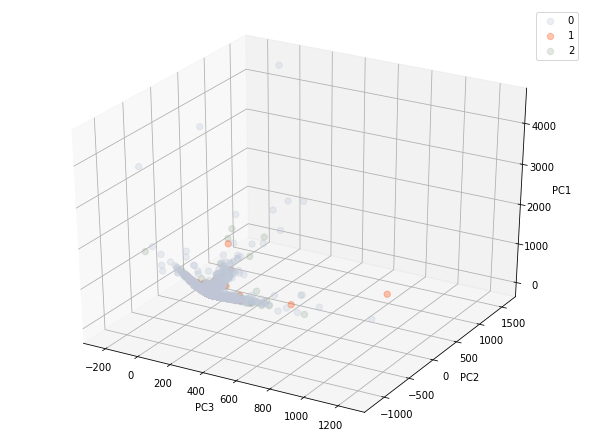

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

pal = ['#BFC8D7','#FF4500', '#A2B59F']
for i in range(3):
  df1=principalDf.iloc[np.where(prime_or_not==i)]
  ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[i],label=i,s=40, alpha=0.3)

ax.set_xlabel("PC3")
ax.set_ylabel("PC2")
ax.set_zlabel("PC1")
#ax.set_xlim(-320, 1140)
#ax.set_ylim(-1185,1610)
#ax.set_zlim(-36, 3570)
#plt.title("3-dim pca+kmeans Scatter Plot(prime)")
plt.legend()
plt.show()
####################################

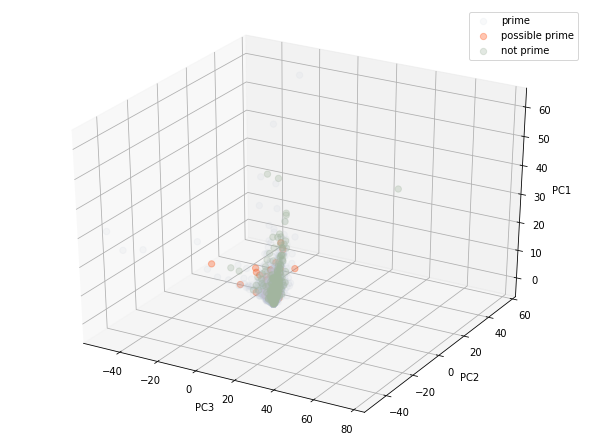

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

pal = ['#BFC8D7','#FF4500', '#A2B59F']

df1=principalDf.iloc[np.where(prime_or_not==0)]
ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[0],label='prime',s=40, alpha=0.1)
df1=principalDf.iloc[np.where(prime_or_not==1)]
ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[1],label='possible prime',s=40, alpha=0.3)
df1=principalDf.iloc[np.where(prime_or_not==2)]
ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[2],label='not prime',s=40, alpha=0.3)

ax.set_xlabel("PC3")
ax.set_ylabel("PC2")
ax.set_zlabel("PC1")
# ax.set_xlim(-320, 1140)
# ax.set_ylim(-1185,1610)
# ax.set_zlim(-36, 3570)
#plt.title("3-dim pca+kmeans Scatter Plot(prime)")
plt.legend()
plt.show()
####################################

In [ ]:
principalDf
dd=principalDf.iloc[np.where(prime_rfm["Prime"]==1)]
ddd=dd.quantile([.1, .25, .5, .75,0.9], axis = 0)
print('prime的個主成分第一四分位數、第三四分位數')
print(ddd.round(3))
dd=principalDf
ddd=dd.quantile([.1, .25, .5, .75,0.9], axis = 0)
print('所有人的個主成分第一四分位數、第三四分位數')
print(ddd.round(3))
#ddd.to_csv('dd.csv')

prime的個主成分第一四分位數、第三四分位數
      principal component 1  principal component 2  principal component 3
0.10                -30.540                -35.564                -11.771
0.25                -25.356                -15.112                 -8.368
0.50                -13.234                 -4.698                 -6.111
0.75                 16.606                 -0.503                 -1.746
0.90                 79.943                 37.802                 33.215
所有人的個主成分第一四分位數、第三四分位數
      principal component 1  principal component 2  principal component 3
0.10                -32.555                -23.857                -10.535
0.25                -28.783                -10.219                 -8.410
0.50                -19.792                 -3.530                 -6.656
0.75                  0.717                  0.094                 -2.864
0.90                 44.220                 27.145                 13.994


In [ ]:
from sklearn.metrics import silhouette_score
k_range = range(2, 11)

distortions = []
scores = []
# 記錄每種 K 值建出的 KMeans 模型的成效
for i in k_range:
    kmeans = KMeans(n_clusters=i).fit(principalDf)
    distortions.append(kmeans.inertia_) # 誤差平方和 (SSE)
    scores.append(silhouette_score(principalDf, kmeans.predict(principalDf))) # 側影係數


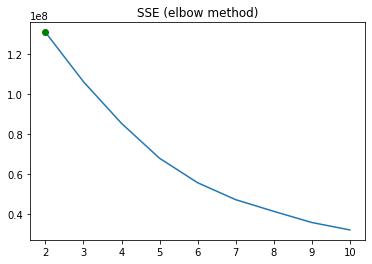

In [ ]:
selected_K = scores.index(max(scores)) + 2
plt.title('SSE (elbow method)')
plt.plot(k_range, distortions)
plt.plot(selected_K, distortions[selected_K - 2], 'go') # 最佳解

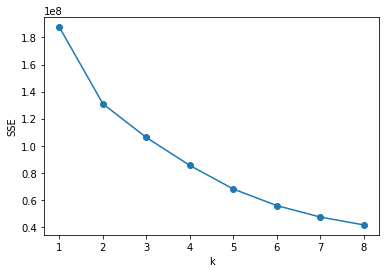

In [ ]:
SSE = []  # 存放每次結果的誤差平方和
for k in range(1, 9):
    estimator = KMeans(n_clusters=k)  # 構造聚類器
    estimator.fit(principalDf)
    SSE.append(estimator.inertia_)
X = range(1, 9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

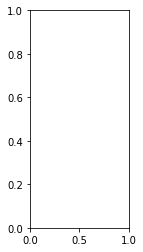

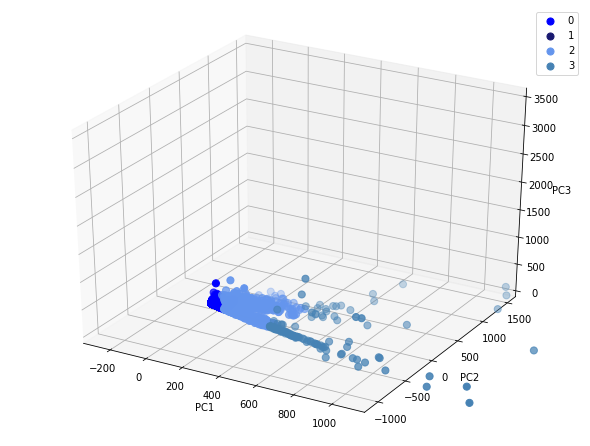

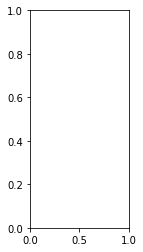

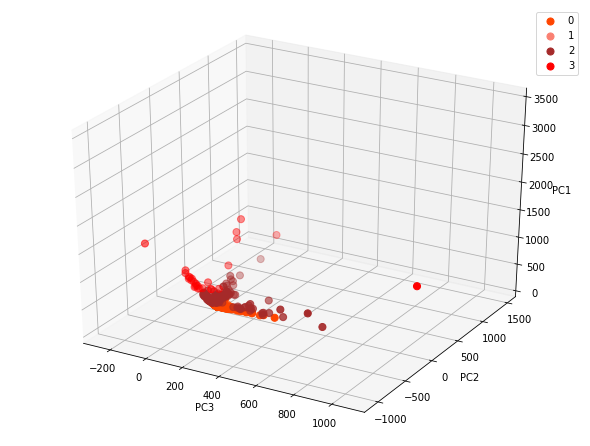

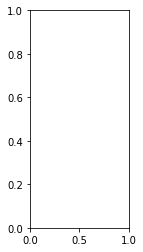

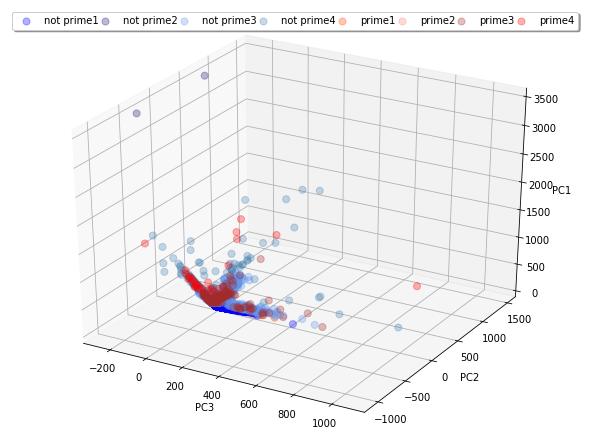

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.subplot(131)
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
pal = ['#0000FF','#191970','#6495ED','#4682B4']
for i in range(len(np.unique(rfm_kmeans_result))):

  df1=principalDf.iloc[np.intersect1d(np.where(rfm_kmeans_result==np.unique(rfm_kmeans_result)[i]),np.where(prime_rfm["Prime"]==0))]
  ax.scatter(list(df1['principal component 1']), list(df1['principal component 2']), list(df1['principal component 3']),c=pal[i],label=i,s=50)


ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_xlim(-320, 1140)
ax.set_ylim(-1185,1610)
ax.set_zlim(-36, 3570)
#plt.title("3-dim pca+kmeans Scatter Plot(not prime)")
plt.legend()
plt.show()
#################################
plt.subplot(132)
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

pal = ['#FF4500','#FA8072','#A52A2A','#FF0000']
for i in range(len(np.unique(rfm_kmeans_result))):

  df1=principalDf.iloc[np.intersect1d(np.where(rfm_kmeans_result==np.unique(rfm_kmeans_result)[i]),np.where(prime_rfm["Prime"]==1))]
  ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[i],label=i,s=50)

ax.set_xlabel("PC3")
ax.set_ylabel("PC2")
ax.set_zlabel("PC1")
ax.set_xlim(-320, 1140)
ax.set_ylim(-1185,1610)
ax.set_zlim(-36, 3570)
#plt.title("3-dim pca+kmeans Scatter Plot(prime)")
plt.legend()
plt.show()
####################################
plt.subplot(133)
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
import matplotlib as mpl
colors = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()][10:40]
col1=['#0000FF','#191970','#6495ED','#4682B4','#FF4500','#FA8072','#A52A2A','#FF0000']
col2=[]
k=0
labels=['not prime1','not prime2','not prime3','not prime4','prime1','prime2','prime3','prime4']
for j in range(2):
  for i in range(4):
    df1=principalDf.iloc[np.intersect1d(np.where(rfm_kmeans_result==np.unique(rfm_kmeans_result)[i]),np.where(prime_rfm["Prime"]==j))]

    ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=col1[k],label=labels[k],s=50,alpha=0.3)
    k+=1

ax.set_xlabel("PC3")
ax.set_ylabel("PC2")
ax.set_zlabel("PC1")
ax.set_xlim(-320, 1140)
ax.set_ylim(-1185,1610)
ax.set_zlim(-36, 3570)
#plt.title("3-dim pca+kmeans Scatter Plot")
plt.legend(loc='best', ncol=8, mode="expand", shadow=True)
plt.show()

In [ ]:

print(principalDf['principal component 1'].min(), principalDf['principal component 1'].max())
print(principalDf['principal component 2'].min(), principalDf['principal component 2'].max())
print(principalDf['principal component 3'].min(), principalDf['principal component 3'].max())

-35.16235787118273 3568.5600780601408
-1184.8801062596672 1606.5627747765825
-319.4323228553855 1138.9310174584375


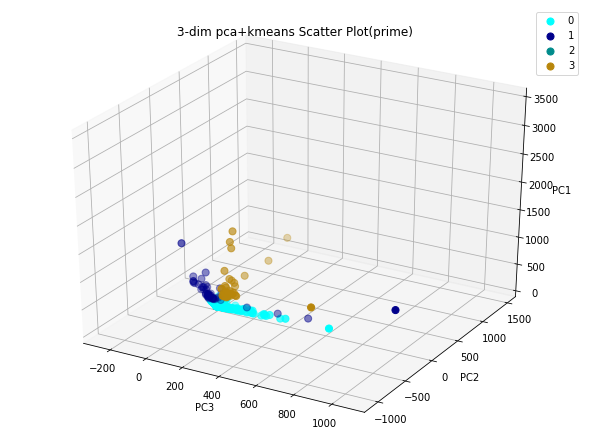

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
import matplotlib as mpl
col = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()][20:40]
for i in range(len(np.unique(rfm_kmeans_result))):

  df1=principalDf.iloc[np.intersect1d(np.where(rfm_kmeans_result==np.unique(rfm_kmeans_result)[i]),np.where(prime_rfm["Prime"]==1))]
  ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[i],label=i,s=50)

ax.set_xlabel("PC3")
ax.set_ylabel("PC2")
ax.set_zlabel("PC1")
ax.set_xlim(-320, 1140)
ax.set_ylim(-1185,1610)
ax.set_zlim(-36, 3570)
plt.title("3-dim pca+kmeans Scatter Plot(prime)")
plt.legend()
plt.show()
#PC3:-200,200
#PC1:0-500
#PC2:0-500

In [ ]:
dd=principalDf.iloc[np.where(prime_rfm["Prime"]==1)]
ddd=dd.quantile([.1, .25, .5, .75,0.9], axis = 0)
dd.columns=['PC1','PC2','PC3']
#ddd.to_csv('dd.csv')

ValueError: ignored

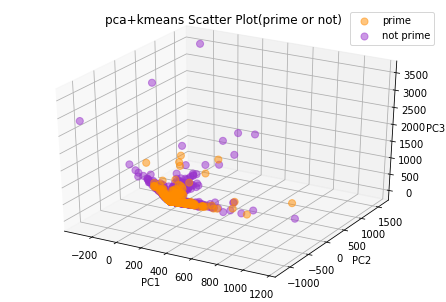

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)
import matplotlib as mpl
col = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()][20:40]


df1=principalDf.iloc[np.where(prime_rfm["Prime"]==1)]
ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[10],label='prime',s=50,alpha=0.5)
df1=principalDf.iloc[np.where(prime_rfm["Prime"]==0)]
ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[11],label='not prime',s=50,alpha=0.5)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("pca+kmeans Scatter Plot(prime or not)")
plt.legend()
plt.show()

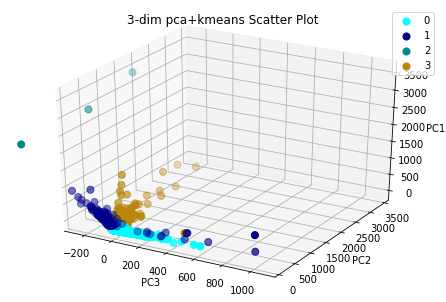

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)
import matplotlib as mpl
col = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()][20:40]
for i in range(len(np.unique(rfm_kmeans_result))):
  df1=principalDf.iloc[np.where(rfm_kmeans_result==np.unique(rfm_kmeans_result)[i])]
  ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[i],label=i,s=50)

ax.set_xlabel("PC3")
ax.set_ylabel("PC2")
ax.set_zlabel("PC1")
ax.set_xlim(-320, 1140)
ax.set_ylim(-1185,1610)
ax.set_ylim(-36, 3570)
plt.title("3-dim pca+kmeans Scatter Plot")
plt.legend()
plt.show()

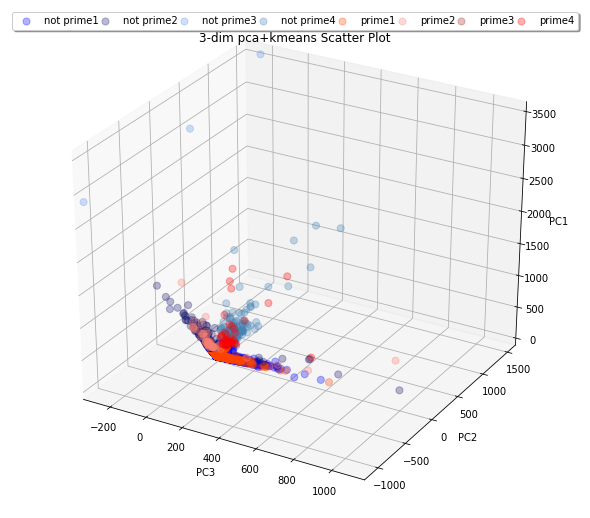

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(8,7))
ax = Axes3D(fig)
import matplotlib as mpl
colors = mcolors.CSS4_COLORS
pal = [color for name, color in colors.items()][10:40]
col1=['#0000FF','#191970','#6495ED','#4682B4','#FF4500','#FA8072','#A52A2A','#FF0000']
col2=[]
k=0
labels=['not prime1','not prime2','not prime3','not prime4','prime1','prime2','prime3','prime4']
for j in range(2):
  for i in range(4):
    df1=principalDf.iloc[np.intersect1d(np.where(rfm_kmeans_result==np.unique(rfm_kmeans_result)[i]),np.where(prime_rfm["Prime"]==j))]

    ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=col1[k],label=labels[k],s=50,alpha=0.3)
    k+=1

ax.set_xlabel("PC3")
ax.set_ylabel("PC2")
ax.set_zlabel("PC1")
ax.set_xlim(-320, 1140)
ax.set_ylim(-1185,1610)
ax.set_zlim(-36, 3570)
plt.title("3-dim pca+kmeans Scatter Plot")
plt.legend(loc='best', ncol=8, mode="expand", shadow=True)
plt.show()

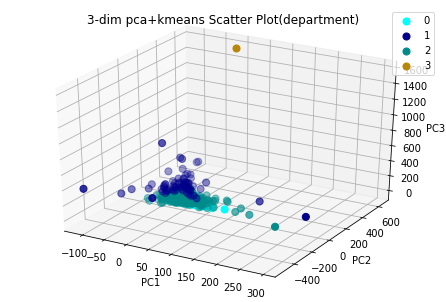

In [ ]:
from sklearn.cluster import KMeans
prime_dep= prime_rfm.loc[:,['3C','休閒','周邊','家電','數位','日用','書店','生活','筆電','美妝']]
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(prime_dep)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(principalDf)
rfm_kmeans_result=kmeans.predict(principalDf)
np.unique(rfm_kmeans_result)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)
import matplotlib as mpl
colors = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()][20:40]
for i in range(len(np.unique(rfm_kmeans_result))):
  df1=principalDf.iloc[np.where(rfm_kmeans_result==np.unique(rfm_kmeans_result)[i])]
  ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[i],label=i,s=50)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3-dim pca+kmeans Scatter Plot(department)")
plt.legend()
plt.show()

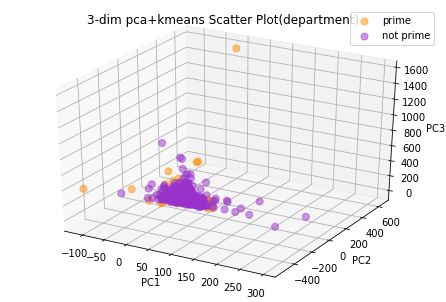

In [ ]:
from sklearn.cluster import KMeans
prime_dep= prime_rfm.loc[:,['3C','休閒','周邊','家電','數位','日用','書店','生活','筆電','美妝']]
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(prime_dep)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(principalDf)
rfm_kmeans_result=kmeans.predict(principalDf)
np.unique(rfm_kmeans_result)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)
import matplotlib as mpl
colors = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()][20:40]

df1=principalDf.iloc[np.where(prime_rfm["Prime"]==1)]
ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[10],label='prime',s=50,alpha=0.5)
df1=principalDf.iloc[np.where(prime_rfm["Prime"]==0)]
ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[11],label='not prime',s=50,alpha=0.5)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3-dim pca+kmeans Scatter Plot(department)")
plt.legend()
plt.show()

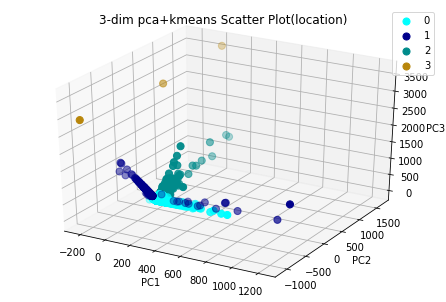

In [ ]:
from sklearn.cluster import KMeans
prime_dep= prime_rfm.loc[:,['north','w_n','w','w_s','s','e']]
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(prime_dep)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(principalDf)
rfm_kmeans_result=kmeans.predict(principalDf)
np.unique(rfm_kmeans_result)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)
import matplotlib as mpl
colors = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()][20:40]
for i in range(len(np.unique(rfm_kmeans_result))):
  df1=principalDf.iloc[np.where(rfm_kmeans_result==np.unique(rfm_kmeans_result)[i])]
  ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[i],label=i,s=50)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3-dim pca+kmeans Scatter Plot(location)")
plt.legend()
plt.show()

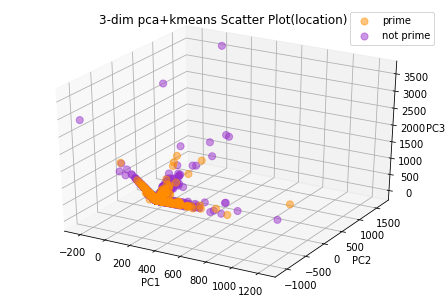

In [ ]:
from sklearn.cluster import KMeans
prime_dep= prime_rfm.loc[:,['north','w_n','w','w_s','s','e']]
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(prime_dep)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(principalDf)
rfm_kmeans_result=kmeans.predict(principalDf)
np.unique(rfm_kmeans_result)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)
import matplotlib as mpl
colors = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()][20:40]

df1=principalDf.iloc[np.where(prime_rfm["Prime"]==1)]
ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[10],label='prime',s=50,alpha=0.5)
df1=principalDf.iloc[np.where(prime_rfm["Prime"]==0)]
ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),c=pal[11],label='not prime',s=50,alpha=0.5)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3-dim pca+kmeans Scatter Plot(location)")
plt.legend()
plt.show()

# DBScan  

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(prime_new)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
from sklearn.cluster import DBSCAN
clustering=DBSCAN(eps=10,min_samples=5).fit(principalDf)
label=clustering.labels_
np.unique(label)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

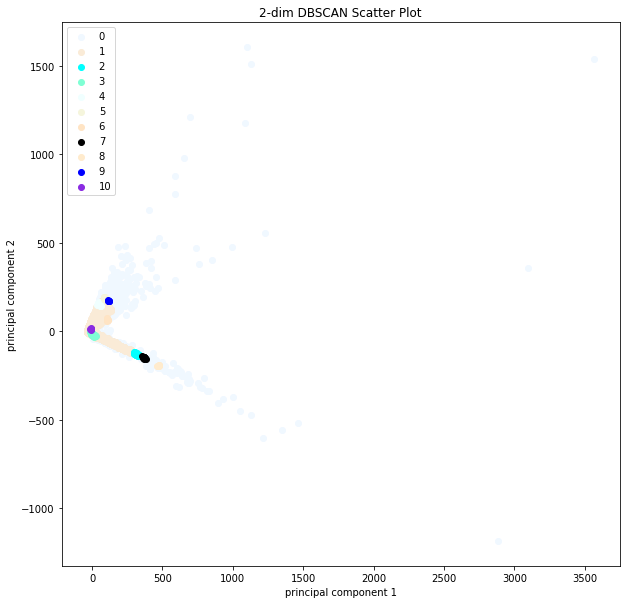

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
import matplotlib as mpl
colors = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()][:20]
for i in range(len(np.unique(label))):
  df1=principalDf.iloc[np.where(label==np.unique(label)[i])]
  plt.scatter(list(df1['principal component 1']), list(df1['principal component 2']),c=pal[i] ,label=i)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.title("2-dim DBSCAN Scatter Plot")
plt.legend()

plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(prime_new)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

from sklearn.cluster import DBSCAN
clustering=DBSCAN(eps=10,min_samples=5).fit(principalDf)
label=clustering.labels_
np.unique(label)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [ ]:
print(principalDf['principal component 3'].min())#-319-1139
print(principalDf['principal component 2'].min())#-1184-1606
print(principalDf['principal component 1'].min())#-35-3569

-319.4323228561642
-1184.8801062596847
-35.16235787118315


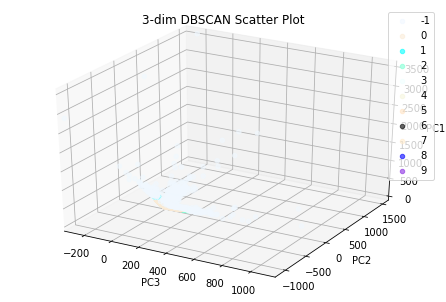

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


import matplotlib as mpl
col = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()]
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, projection='3d')
fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(np.unique(label))):
  df1=principalDf.iloc[np.where(label ==np.unique(label)[i])]

  ax.scatter(list(df1['principal component 3']), list(df1['principal component 2']), list(df1['principal component 1']),alpha=0.6,c=pal[i] ,label=np.unique(label)[i])

ax.set_zlim(-35,3569)
ax.set_ylim(-1184,1606)
ax.set_xlim(-319,1139)
ax.set_xlabel("PC3")
ax.set_ylabel("PC2")
ax.set_zlabel("PC1")
plt.title("3-dim DBSCAN Scatter Plot")
plt.legend()

plt.show()

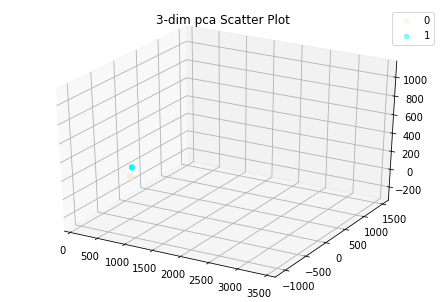

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
df1=principalDf.iloc[np.where(label ==np.unique(label)[2])]
ax.scatter(list(df1['principal component 1']), list(df1['principal component 2']), list(df1['principal component 3']),alpha=0.5,c=pal[1] ,label=np.unique(label)[1])
df1=principalDf.iloc[np.where(label ==np.unique(label)[10])]
ax.scatter(list(df1['principal component 1']), list(df1['principal component 2']), list(df1['principal component 3']),alpha=0.5,c=pal[2] ,label=np.unique(label)[2])
ax.set_xlim(-35,3569)
ax.set_ylim(-1184,1606)
ax.set_zlim(-319,1139)
#plt.xlabel("principal component 1")
#plt.ylabel("principal component 2")
#plt.zlabel("principal component 3")
plt.title("3-dim pca Scatter Plot")
plt.legend()

plt.show()

# rfm 散佈圖

In [ ]:
rfm_draw=prime_new.loc[:,['r_n','f_n','m_n']]
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(rfm_draw)
rfm_kmeans_result=kmeans.predict(rfm_draw)
np.unique(rfm_kmeans_result)

array([0, 1, 2, 3], dtype=int32)

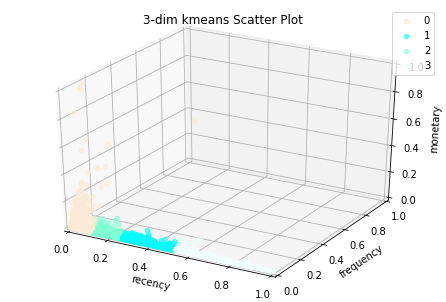

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


import matplotlib as mpl
col = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()]
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, projection='3d')
fig = plt.figure()
ax = Axes3D(fig)


df1= rfm_draw.iloc[np.where(rfm_kmeans_result==0)]
ax.scatter(list(df1['r_n']), list(df1['f_n']), list(df1['m_n']),alpha=0.6,c=pal[1] ,label='0')
df1= rfm_draw.iloc[np.where(rfm_kmeans_result==1)]
ax.scatter(list(df1['r_n']), list(df1['f_n']), list(df1['m_n']),alpha=0.6,c=pal[2] ,label='1')
df1= rfm_draw.iloc[np.where(rfm_kmeans_result==2)]
ax.scatter(list(df1['r_n']), list(df1['f_n']), list(df1['m_n']),alpha=0.6,c=pal[3] ,label='2')
df1= rfm_draw.iloc[np.where(rfm_kmeans_result==3)]
ax.scatter(list(df1['r_n']), list(df1['f_n']), list(df1['m_n']),alpha=0.6,c=pal[4] ,label='3')
ax.set_zlim(0,1)
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_xlabel("recency")
ax.set_ylabel("frequency")
ax.set_zlabel("monetary")
plt.title("3-dim kmeans Scatter Plot")
plt.legend()

plt.show()

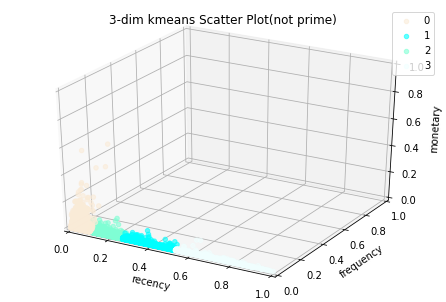

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


import matplotlib as mpl
col = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()]
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, projection='3d')
fig = plt.figure()
ax = Axes3D(fig)


df1= rfm_draw.iloc[np.intersect1d(np.where(rfm_kmeans_result==0),np.where(prime_rfm["Prime"]==0))]
ax.scatter(list(df1['r_n']), list(df1['f_n']), list(df1['m_n']),alpha=0.6,c=pal[1] ,label='0')
df1= rfm_draw.iloc[np.intersect1d(np.where(rfm_kmeans_result==1),np.where(prime_rfm["Prime"]==0))]
ax.scatter(list(df1['r_n']), list(df1['f_n']), list(df1['m_n']),alpha=0.6,c=pal[2] ,label='1')
df1= rfm_draw.iloc[np.intersect1d(np.where(rfm_kmeans_result==2),np.where(prime_rfm["Prime"]==0))]
ax.scatter(list(df1['r_n']), list(df1['f_n']), list(df1['m_n']),alpha=0.6,c=pal[3] ,label='2')
df1= rfm_draw.iloc[np.intersect1d(np.where(rfm_kmeans_result==3),np.where(prime_rfm["Prime"]==0))]
ax.scatter(list(df1['r_n']), list(df1['f_n']), list(df1['m_n']),alpha=0.6,c=pal[4] ,label='3')
ax.set_zlim(0,1)
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_xlabel("recency")
ax.set_ylabel("frequency")
ax.set_zlabel("monetary")
plt.title("3-dim kmeans Scatter Plot(not prime)")
plt.legend()

plt.show()

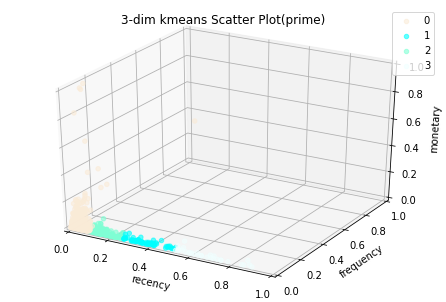

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


import matplotlib as mpl
col = mpl.colors.CSS4_COLORS
pal = [color for name, color in colors.items()]
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, projection='3d')
fig = plt.figure()
ax = Axes3D(fig)


df1= rfm_draw.iloc[np.intersect1d(np.where(rfm_kmeans_result==0),np.where(prime_rfm["Prime"]==1))]
ax.scatter(list(df1['r_n']), list(df1['f_n']), list(df1['m_n']),alpha=0.6,c=pal[1] ,label='0')
df1= rfm_draw.iloc[np.intersect1d(np.where(rfm_kmeans_result==1),np.where(prime_rfm["Prime"]==1))]
ax.scatter(list(df1['r_n']), list(df1['f_n']), list(df1['m_n']),alpha=0.6,c=pal[2] ,label='1')
df1= rfm_draw.iloc[np.intersect1d(np.where(rfm_kmeans_result==2),np.where(prime_rfm["Prime"]==1))]
ax.scatter(list(df1['r_n']), list(df1['f_n']), list(df1['m_n']),alpha=0.6,c=pal[3] ,label='2')
df1= rfm_draw.iloc[np.intersect1d(np.where(rfm_kmeans_result==3),np.where(prime_rfm["Prime"]==1))]
ax.scatter(list(df1['r_n']), list(df1['f_n']), list(df1['m_n']),alpha=0.6,c=pal[4] ,label='3')
ax.set_zlim(0,1)
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_xlabel("recency")
ax.set_ylabel("frequency")
ax.set_zlabel("monetary")
plt.title("3-dim kmeans Scatter Plot(prime)")
plt.legend()

plt.show()

# 建模型

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None, shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from xgboost import XGBClassifier
! pip3 install catboost
from catboost import CatBoostClassifier
import lightgbm as lgb
knn = KNeighborsClassifier(n_neighbors=3)
LR = LogisticRegression(penalty = 'none')
RF = RandomForestClassifier(n_estimators=100)
MLP = MLPClassifier(hidden_layer_sizes = (256,128), activation="relu", random_state=1)
SVM = svm.SVC(gamma=0.001, C=10., kernel='linear', max_iter=10000, probability=True)
XGB = XGBClassifier(n_estimators=100, learning_rate= 0.3, max_depth=6)
CAT = CatBoostClassifier(iterations=10,
                learning_rate=1,
                depth=2,
                loss_function='MultiClass')
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1,
                            max_depth=-5, feature_fraction=0.5, random_state=42)

In [ ]:
! pip3 install deep-forest

In [ ]:
# random forest 先等等
from deepforest.cascade import CascadeForestRegressor
from deepforest.cascade import CascadeForestClassifier
from sklearn.metrics import mean_absolute_error

# create model
DPF = CascadeForestClassifier(random_state=1,
                use_predictor=True,
                predictor='lightgbm')
x_train.to_numpy()
DPF.fit(x_train.values[:,:],y_train)
DPF_predicted=DFF.predict(x_test)
# X_train.values[:,:]

In [ ]:
def model(x_train,y_train,x_test,y_test):
  knn.fit(x_train, y_train)
  LR.fit(x_train, y_train)
  RF.fit(x_train, y_train)
  MLP.fit(x_train, y_train)
  LGBM.fit(x_train, y_train)

  knn_predicted = knn.predict(x_test)
  LR_predicted = LR.predict(x_test)
  RF_predicted = RF.predict(x_test)
  MLP_predicted = MLP.predict(x_test)
  LGBM_predicted = LGBM.predict(x_test)

  from sklearn.metrics import confusion_matrix
  from sklearn import metrics
  ensemble=knn_predicted+LR_predicted+RF_predicted+MLP_predicted+LGBM_predicted
  ensemble[np.where(ensemble>1)]=1
  cm = confusion_matrix(y_test,ensemble)
  print('Confusion Matrix : \n', cm,'\n','\n','Accuracy : \n',metrics.accuracy_score(y_test, ensemble),'\n','Recall : \n',recall_score(y_test,ensemble))
  return(ensemble)

In [ ]:
model(x_train, y_train, x_test, y_test)

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm1 = confusion_matrix(y_test,MLP_predicted)
print('Confusion Matrix : \n', cm1,'\n','\n','Accuracy : \n',metrics.accuracy_score(y_test, MLP_predicted))

In [ ]:
set1 = set(np.where(y_test==1)[0])
set2 = set(np.where(MLP_predicted==1)[0])
len(set1&set2)/len(set1)

l=list(np.where(MLP_predicted==1))
ll=list((np.where(y_test==1)))
l.append(ll)
l

array=np.append(np.where(y_test==1)[0],np.where(MLP_predicted==1)[0])
print(len(array),len(np.unique(array)))

MLP_predicted.sum()

from sklearn import metrics
metrics.accuracy_score(y_test, MLP_predicted)

prime_y.sum()/len(prime_y) #prime會員佔的比例